# Data Analysis with Pandas

## Outline

### Part 1

* [Intro to Pandas](#Intro-to-Pandas)
* [Pandas Data Structures](#Pandas-Data-Structures)
* [DataFrame](#DataFrame)
* [Dealing with Columns](#Dealing-with-Columns)

### Part 2

* [Indexing & Selecting](#Indexing-&-Selecting)
* [Grouping](#Grouping)
* [Handling Missing Data](#Handling-Missing-Data)


### Part 3

* [Plotting](#Plotting)

---

## Part 1

### Intro to Pandas

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

/Users/zkan/Projects/zkan/python-for-data-analysis/ENV/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
import pandas as pd

## DataFrame

### Reading Data from File

UCI Machine Learning Repository: [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult)

การอ่านไฟล์ เราไม่จำเป็นต้องมีไฟล์บนเครื่องก็ได้ ในที่นี้เราจะอ่านไฟล์จาก URL ซึ่งข้อมูลจะต้องอยู่ในรูปแบบที่เราจะอ่าน ในที่นี้คือ CSV ถ้าเป็น JSON ก็ให้ใช้คำสั่ง `read_json` แทน

In [3]:
adult = pd.read_csv("adult.csv")

In [4]:
adult.head(3)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


ข้างต้นเราสังเกตเห็นว่าข้อมูลแถวแรกของเรากลายเป็น header ไป เนื่องจากว่าข้อมูลที่โหลดมาไม่มี header ที่แถวแรกนั่นเอง เราแก้ได้โดยการใส่ `header=None` เข้าไปตอนที่โหลดข้อมูล

In [5]:
adult = pd.read_csv("adult.csv", header=None)

In [6]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


เราสามารถใส่ชื่อ column ได้ดังนี้

In [7]:
columns = ["age", "Work Class", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Money Per Year"]
adult.columns = columns

In [8]:
adult.head(2)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
adult["age"][0:3]

0    39
1    50
2    38
Name: age, dtype: int64

In [10]:
columns = ["age", "Work Class", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Money Per Year"]
adult = pd.read_csv("adult.csv", names=columns)

In [11]:
adult.head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


เราสามารถเลือกข้อมูลเฉพาะ column นั้นๆ ได้ตามนี้

In [12]:
adult["age"]

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

คำสั่ง `value_count` เป็นคำสั่งเอาไว้นับจำนวนของค่าที่อยู่ใน column นั้นๆ เช่นถ้าเราต้องการนับจำนวนของคนที่มีอายุในแต่ละช่วง ทำได้ตามนี้

In [13]:
adult.age.value_counts(ascending=True)

87      1
86      1
85      3
88      3
83      6
     ... 
35    876
23    877
34    886
31    888
36    898
Name: age, Length: 73, dtype: int64

คำนวณค่าสถิติพื้นฐานได้

In [14]:
adult.age.mean()

38.58164675532078

In [15]:
adult.age.std()

13.640432553581341

In [16]:
adult.age.value_counts(ascending=True)[0:5]

87    1
86    1
85    3
88    3
83    6
Name: age, dtype: int64

In [17]:
adult.age.value_counts().index[0]

36

In [18]:
adult[adult["age"] > 50]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [19]:
adult[adult.age > 60] 

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
140,61,Self-emp-inc,66614,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
144,70,Private,105376,Some-college,10,Never-married,Tech-support,Other-relative,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
32525,81,?,120478,Assoc-voc,11,Divorced,?,Unmarried,White,Female,0,0,1,?,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K


In [20]:
adult_age_36 = adult.age == adult.age.value_counts().index[0]

In [21]:
adult[adult_age_36]["sex"].value_counts()

 Male      611
 Female    287
Name: sex, dtype: int64

In [22]:
adult.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

## Dealing with Columns

### Renaming Columns

In [23]:
columns = ["age", "Work Class", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Money Per Year"]
adult = pd.read_csv("adult.csv", names=columns)

In [24]:
adult.head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
adult.rename(columns={"Work Class": "workclass"})

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
adult.head(1)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [27]:
adult_new = adult.rename(columns={"Work Class": "workclass"})

In [28]:
adult_new.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [29]:
adult_new.columns.str.lower()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'money per year'],
      dtype='object')

In [30]:
adult_new.columns = adult_new.columns.str.lower() \
    .str.replace(" ", "-") \
    .str.replace("-", "_")

In [31]:
adult_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'money_per_year'],
      dtype='object')

In [32]:
adult_new.money_per_year.value_counts()

 <=50K    24720
 >50K      7841
Name: money_per_year, dtype: int64

In [33]:
adult_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  money_per_year  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Adding New Columns

In [34]:
adult["normalized-age"] = (adult.age - adult.age.mean()) / adult.age.std()

In [35]:
adult.head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year,normalized-age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.030670
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.837096
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,-0.042641
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1.057031
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,-0.775756


In [36]:
adult[adult["capital-gain"] > 5000]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year,normalized-age
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,-0.555822
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,0.250604
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K,-0.629133
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K,0.397227
101,44,Private,198282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K,0.397227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,185041,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,50,United-States,>50K,0.690473
32466,37,Private,121521,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States,>50K,-0.115953
32518,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K,1.350276
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K,-0.042641


In [37]:
adult["normalized-age"] > 1

0        False
1        False
2        False
3         True
4        False
         ...  
32556    False
32557    False
32558     True
32559    False
32560    False
Name: normalized-age, Length: 32561, dtype: bool

In [38]:
adult[adult["normalized-age"] > 1]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year,normalized-age
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1.057031
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K,1.130342
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K,1.496899
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,1.276965
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,1.130342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,2.376637
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K,2.449948
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K,1.936768
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1.057031


In [39]:
adult.sex[0]

' Male'

In [40]:
adult.head(2)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year,normalized-age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.030670
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.837096


In [41]:
" yyy".strip() 

'yyy'

In [42]:
adult[adult["sex"].str.strip() == "Male"]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year,normalized-age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.030670
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.837096
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,-0.042641
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1.057031
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,0.983719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,-0.482510
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,1.057031
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,-1.215625
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0.103982


In [43]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   Work Class      32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  int64  
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  Money Per Year  32561 non-null  object 
 15  normalized-age  32561 non-null  float64
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


### Removing Existing Columns

In [44]:
adult.drop("normalized-age")

KeyError: "['normalized-age'] not found in axis"

We need to specify the parameter called `axis` when we drop.

In [45]:
adult.drop("normalized-age", axis="columns")

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [46]:
adult.head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year,normalized-age
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0.030670
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0.837096
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,-0.042641
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1.057031
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,-0.775756


In [47]:
adult = adult.drop("normalized-age", axis="columns")

In [48]:
adult.head(2)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [49]:
adult.drop([0, 1], axis="index")

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


---

## Part 2

## Indexing & Selecting

In [50]:
import pandas as pd

In [51]:
columns = ["age", "Work Class", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Money Per Year"]
adult = pd.read_csv("adult.csv", names=columns)

In [52]:
adult.head(2)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


การเลือก column นั้นมาทำได้โดยสั่ง

In [53]:
adult["age"]

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

ถ้าต้องการมากกว่า 1 column ทำได้โดยสั่ง

In [54]:
adult[["age", "education", "occupation"]].head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


การอ้างอิงถึง column นั้น เราสามารถใช้ . ในการอ้างถึงได้ เช่น ถ้าเราอยากได้ค่า age

In [55]:
adult.age

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

ซึ่งในการใช้ . นั้น ชื่อ column จำเป็นต้องอยู่ในรูปแบบของชื่อตัวแปร คือ ห้ามมาเว้นวรรค แล้วก็ห้ามมี -

ถ้าเราอยาก filter ข้อมูลของคนที่มีอายุมากกว่า 30 ทำได้ดังนี้

In [56]:
adult[adult.age > 30].head(3)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


ถ้าอยากใส่มากกว่า 1 condition

In [57]:
adult[(adult.age > 30) & (adult["capital-gain"] > 2000)].head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
101,44,Private,198282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,>50K


In [58]:
adult.loc[11:12, ["age", "education"]]

,age,education
11,30,Bachelors
12,23,Bachelors


In [59]:
adult[(adult["capital-gain"] > 30000) & (adult["capital-gain"] < 50000)][["age", "education"]]

,age,education
106,17,10th
4568,18,HS-grad
6433,27,Preschool
7186,19,HS-grad
15376,55,HS-grad
17039,20,Some-college
20176,63,Masters


In [60]:
adult.loc[(adult["capital-gain"] > 30000) & (adult["capital-gain"] < 50000), ["age", "education", "capital-gain"]]

,age,education,capital-gain
106,17,10th,34095
4568,18,HS-grad,34095
6433,27,Preschool,41310
7186,19,HS-grad,34095
15376,55,HS-grad,34095
17039,20,Some-college,34095
20176,63,Masters,41310


In [61]:
adult[adult.education == "Masters"]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year


In [62]:
adult.education[0]

' Bachelors'

ข้อมูลมีเว้นวรรคปนเข้ามา เราสามารถตัดออกได้ตามนี้

In [63]:
adult.education = adult.education.str.strip()

In [64]:
adult[adult.education == "Masters"].head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


In [65]:
adult[adult.education.isin(["Bachelors", "Masters"])].head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [66]:
adult[adult.education.str.contains("Mas")]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32504,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K
32513,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


## Grouping

การ group ข้อมูล จำเป็นต้องมี aggregation ตามมาเสมอ เช่น group เสร็จแล้วหาค่า mean หรือ group เสร็จแล้วหาค่า median เป็นต้น

In [67]:
#adult.groupby("education").agg("mean").head(2)
adult.groupby("education").mean().head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957


In [68]:
adult.groupby("education").mean().reset_index().head(2)

,education,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
1,11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957


เราไม่จำเป็นต้องทำภายในคำสั่งเดียวเสมอไป เราสามารถเก็บใส่ตัวแปรก่อนได้

In [69]:
# Same result as above

adult_group = adult.groupby("education")
adult_group.mean().tail()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
HS-grad,38.974479,189538.739739,9.0,576.800114,70.466622,40.575374
Masters,44.049913,179852.362739,14.0,2562.563552,166.719675,43.836332
Preschool,42.764706,235889.372549,1.0,898.392157,66.490196,36.647059
Prof-school,44.746528,185663.706597,15.0,10414.416667,231.203125,47.425347
Some-college,35.756275,188742.922370,10.0,598.824167,71.637087,38.852284


เราสามารถ group ข้อมูลได้มากกว่า 1 column ซึ่งลำดับจะมีผลต่อผลลัพธ์ที่ได้ออกมา

In [70]:
adult.groupby(["education", "sex"]).mean().head()

age         fnlwgt  education-num  capital-gain  \
education sex                                                              
10th       Female  35.447458  187333.010169            6.0    174.901695   
           Male    38.346395  201224.846395            6.0    510.771160   
11th       Female  30.546296  193806.465278            7.0    128.108796   
           Male    33.407806  195580.212651            7.0    265.675639   
12th       Female  29.756944  182910.145833            8.0    174.729167   

                   capital-loss  hours-per-week  
education sex                                    
10th       Female     69.132203       32.111864  
           Male       51.164577       39.336991  
11th       Female     21.578704       29.821759  
           Male       66.650067       36.312248  
12th       Female     11.951389       31.791667

In [71]:
adult.groupby(["sex", "education"]).mean()

age         fnlwgt  education-num  capital-gain  \
sex     education                                                             
 Female 10th          35.447458  187333.010169            6.0    174.901695   
        11th          30.546296  193806.465278            7.0    128.108796   
        12th          29.756944  182910.145833            8.0    174.729167   
        1st-4th       48.521739  203190.043478            2.0     44.826087   
        5th-6th       44.369048  222695.214286            3.0     53.833333   
        7th-8th       49.693750  179158.456250            4.0     94.318750   
        9th           42.131944  209924.618056            5.0    780.937500   
        Assoc-acdm    36.361045  179393.266033           12.0    715.724466   
        Assoc-voc     37.872000  186482.816000           11.0    455.078000   
        Bachelors     35.635578  182117.074737           13.0   1051.970970   
        Doctorate     45.325581  190958.244186           16.0   3346.779070   
        HS-grad       38.678171  187480.505900            9.0    385.584661   
        Masters       43.074627  176480.835821           14.0   1508.660448   
        Preschool     41.750000  198960.375000            1.0    281.750000   
        Prof-school   40.195652  170992.695652           15.0   3257.413043   
        Some-college  33.740556  185066.259800           10.0    326.562010   
 Male   10th          38.346395  201224.846395            6.0    510.771160   
        11th          33.407806  195580.212651            7.0    265.675639   
        12th          33.117647  207163.183391            8.0    338.577855   
        1st-4th       45.245902  252919.360656            2.0    156.434426   
        5th-6th       42.385542  235738.542169            3.0    217.240964   
        7th-8th       48.034979  191016.032922            4.0    279.905350   
        9th           40.643243  199589.672973            5.0    171.294595   
        Assoc-acdm    38.046440  202568.023220           12.0    591.309598   
        Assoc-voc     38.939909  179358.465986           11.0    862.428571   
        Bachelors     40.321734  190629.518201           13.0   2061.521146   
        Doctorate     48.327217  185578.529052           16.0   5144.486239   
        HS-grad       39.115736  190519.953734            9.0    667.957531   
        Masters       44.490312  181374.804549           14.0   3038.462511   
        Preschool     43.228571  252771.200000            1.0   1180.285714   
        Prof-school   45.611570  188452.411157           15.0  11774.838843   
        Some-college  37.017391  191043.193311           10.0    769.162542   

                      capital-loss  hours-per-week  
sex     education                                   
 Female 10th             69.132203       32.111864  
        11th             21.578704       29.821759  
        12th             11.951389       31.791667  
        1st-4th          34.826087       31.978261  
        5th-6th          53.190476       36.047619  
        7th-8th          54.775000       36.200000  
        9th              16.277778       33.916667  
        Assoc-acdm       68.472684       37.358670  
        Assoc-voc        57.258000       37.830000  
        Bachelors        75.046943       39.329216  
        Doctorate       309.511628       47.302326  
        HS-grad          53.585251       36.577286  
        Masters         140.595149       41.113806  
        Preschool         0.000000       31.875000  
        Prof-school     157.413043       44.793478  
        Some-college     47.529223       34.574840  
 Male   10th             51.164577       39.336991  
        11th             66.650067       36.312248  
        12th             42.494810       37.768166  
        1st-4th          53.418033       40.622951  
        5th-6th          73.333333       39.859438  
        7th-8th          69.255144       40.409465  
        9th              33.948649       39.651351  
        Assoc-ac

In [72]:
adult.columns = adult.columns.str.lower().str.replace(" ", "-")
adult[["capital-gain", "capital-loss", "money-per-year"]].groupby("money-per-year").mean()

,capital-gain,capital-loss
money-per-year,,
<=50K,148.752468,53.142921
>50K,4006.142456,195.001530


## Handling Missing Data

การจัดการ missing data เบื้องต้นทำได้หลายวิธี ไม่ว่าจะเป็น
1. แทนที่ค่านั้นด้วยค่าเฉลี่ย
2. แทนที่ค่านั้นด้วยค่าที่เกิดขึ้นบ่อยที่สุด
3. แทนที่ค่านั้นด้วยการเดา หรือมาจาก domain expert
4. ลบข้อมูลที่มี missing data ทิ้งไปเลย

_หมายเหตุ:_ ในการทำงานจริงกับข้อมูลจริง วิธีจัดการ missing data ข้างต้นอาจจะไม่เหมาะ อยากลองไปศึกษาเพิ่มเติมดูว่ามีวิธีอะไรบ้างที่ดีกว่า เหมาะสมกว่า

In [73]:
titanic = pd.read_csv("titanic.csv")

เราใช้ `info` ดูได้เบื้องต้นว่ามี missing data หรือเปล่า

In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


เนื่องจาก `info` จะนับจำนวนแถวที่มีค่าอยู่จริง ดังนั้นเราจะดูว่ามี missing data ได้ เช่น boat มีค่าจริงๆ อยู่ 486 ค่าเท่านั้นจากข้อมูลทั้งหมด 1309

In [75]:
titanic.shape

(891, 12)

In [76]:
titanic.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [77]:
titanic.notnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True


In [78]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
df = titanic.drop("Cabin", axis="columns")

In [80]:
df.dropna().shape

(712, 11)

โค้ดด้านล่างนี้เป็นการ drop แถวที่ age หรือ body ตัวใดตัวหนึ่ง มี missing data

In [81]:
titanic.dropna(subset=["Age", "Cabin"], how="any").shape

(185, 12)

โค้ดด้านล่างนี้เป็นการ drop แถวที่ age และ body มี missinge data ทั้งคู่

In [82]:
titanic.dropna(subset=["Age", "Cabin"], how='all').shape

(733, 12)

แทนค่า missing data ที่ column ชื่อ Cabin ด้วยค่าเฉลี่ย

In [83]:
age_mean = titanic["Age"].mean()

In [84]:
titanic["Age"] = titanic["Age"].fillna(age_mean)

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
titanic["Cabin"].value_counts(dropna=False).head()

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
Name: Cabin, dtype: int64

แทนค่า missing data ที่ column ชื่อ cabin ด้วยค่าของ cabin ที่เกิดขึ้นบ่อยที่สุด ในที่นี้คือ "C23 C25 C27"

In [88]:
titanic["Cabin"].fillna("C23 C25 C27").value_counts().head()

C23 C25 C27    691
G6               4
B96 B98          4
F2               3
E101             3
Name: Cabin, dtype: int64

---

## Part 3

## Plotting

In [89]:
%matplotlib inline 

import pandas as pd

คำสั่ง `%matplotlib inline` เป็นการบอกว่ากราฟที่เราสร้างขึ้นมาให้แสดงผลออกทาง notebook นี้

### Biometric statistics for a group of office workers

Credit: https://people.sc.fsu.edu/~jburkardt/datasets/datasets.html

In [90]:
df = pd.read_csv("biostats.csv")

In [91]:
df.columns

Index(['Name', '     "Sex"', ' "Age"', ' "Height (in)"', ' "Weight (lbs)"'], dtype='object')

In [92]:
df.columns = ["Name", "Sex", "Age", "Height (in)", "Weight (lbs)"]

In [93]:
df.head()

,Name,Sex,Age,Height (in),Weight (lbs)
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124


In [94]:
df["Sex"] = df["Sex"].str.replace('"', "")

In [95]:
df.head()

,Name,Sex,Age,Height (in),Weight (lbs)
0,Alex,M,41,74,170
1,Bert,M,42,68,166
2,Carl,M,32,70,155
3,Dave,M,39,72,167
4,Elly,F,30,66,124


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          18 non-null     object
 1   Sex           18 non-null     object
 2   Age           18 non-null     int64 
 3   Height (in)   18 non-null     int64 
 4   Weight (lbs)  18 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 848.0+ bytes


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height (in)'}>],
       [<AxesSubplot:title={'center':'Weight (lbs)'}>, <AxesSubplot:>]],
      dtype=object)

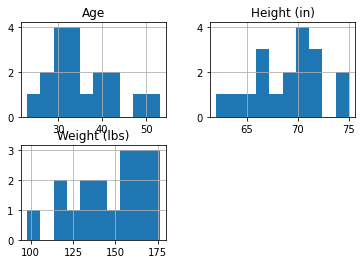

In [97]:
df.hist()

Sex
       F    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
       M    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

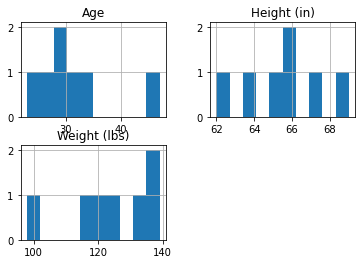

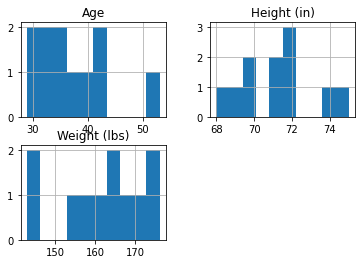

In [98]:
df.groupby("Sex").hist()

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

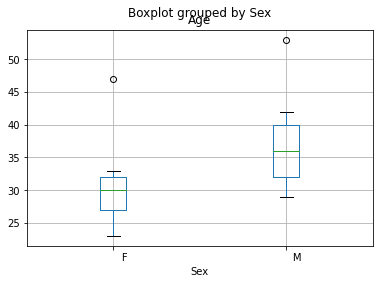

In [99]:
df.boxplot(column=["Age"], by="Sex")

<AxesSubplot:title={'center':'Height (in)'}, xlabel='Sex'>

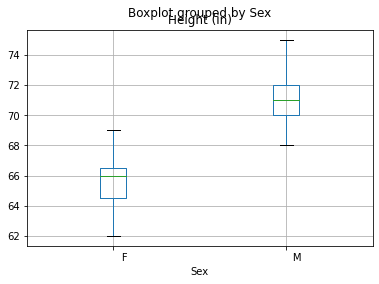

In [100]:
df.boxplot(column=["Height (in)"], by="Sex")

ถ้าเราอยากให้กราฟของเรามาอยู่รวมๆ กัน เราจะนำความสามารถของ `subplots` ใน `matplotlib` เข้ามาช่วย

In [101]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Weight (lbs)'}, xlabel='Sex'>

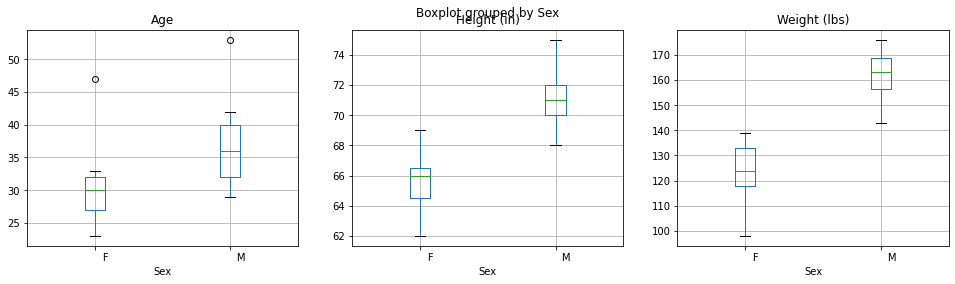

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

df.boxplot(column=["Age"], by="Sex", ax=ax1)
df.boxplot(column=["Height (in)"], by="Sex", ax=ax2)
df.boxplot(column=["Weight (lbs)"], by="Sex", ax=ax3)

### Seaborn

Seaborn เป็น package ที่แนะนำให้ศึกษาก่อน ถ้าอยากจะทำ data visualization ใน Python เพราะว่าง่ายกว่าการใช้ Matplotlib หรือการใช้ Pandas สร้างกราฟ

In [103]:
import seaborn as sns

### Revisit: Total awards vs. population by state

Text(0.5, 1.0, 'Total awards vs. population by state')

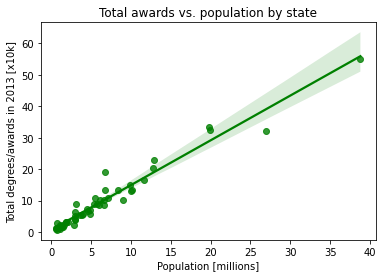

In [104]:
df = pd.read_csv("pop_vs_degrees.csv")
df["pop"] = df["pop"] / 1000000
df["degrees"] = df["degrees"] / 10000

g = sns.regplot(x="pop", y="degrees", data=df, color="g")

g.set_xlabel("Population [millions]")
g.set_ylabel("Total degrees/awards in 2013 [x10k]")
g.set_title("Total awards vs. population by state")

<AxesSubplot:>

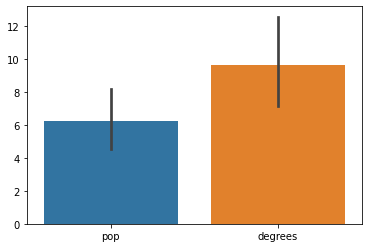

In [105]:
sns.barplot(data=df)

### Revisit: Biometric statistics for a group of office workers

In [106]:
df = pd.read_csv("biostats.csv")
df.columns = ["Name", "Sex", "Age", "Height (in)", "Weight (lbs)"]
df["Sex"] = df["Sex"].str.replace('"', "")

<AxesSubplot:xlabel='Sex', ylabel='Weight (lbs)'>

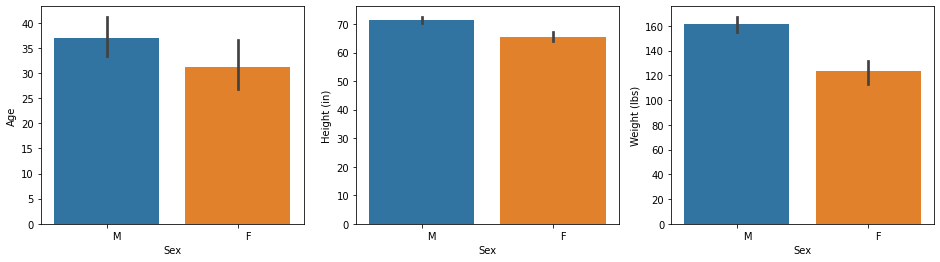

In [107]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.barplot(x="Sex", y="Age", data=df, ax=ax1)
sns.barplot(x="Sex", y="Height (in)", data=df, ax=ax2)
sns.barplot(x="Sex", y="Weight (lbs)", data=df, ax=ax3)

<AxesSubplot:xlabel='Sex', ylabel='Weight (lbs)'>

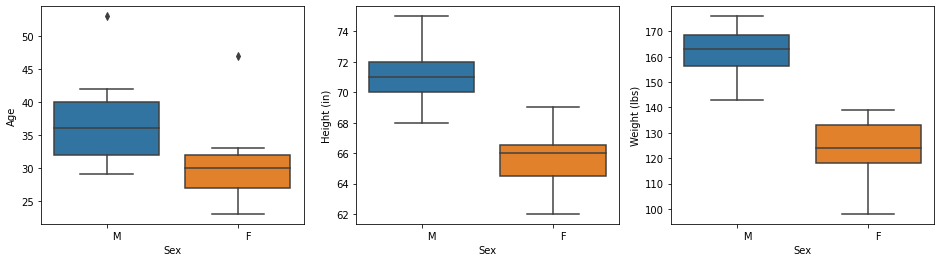

In [108]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.boxplot(x="Sex", y="Age", data=df, ax=ax1)
sns.boxplot(x="Sex", y="Height (in)", data=df, ax=ax2)
sns.boxplot(x="Sex", y="Weight (lbs)", data=df, ax=ax3)

/Users/zkan/Projects/zkan/python-for-data-analysis/ENV/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

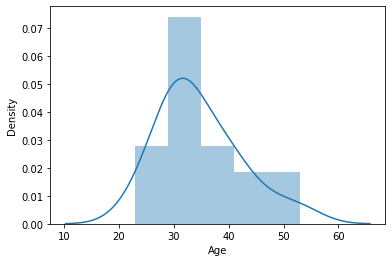

In [109]:
sns.distplot(df["Age"])

### Titatic

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
titanic_df = pd.read_csv("titanic.csv")

In [112]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
titanic_df = titanic_df.drop(["Name", "Ticket", "Cabin"], axis="columns").dropna(how="any")

In [114]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

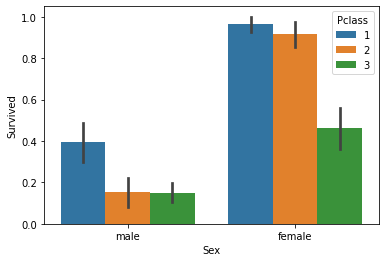

In [115]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

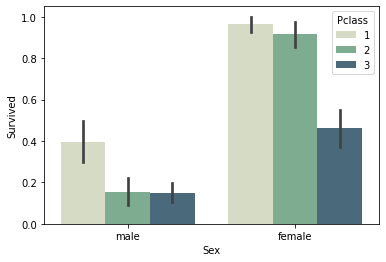

In [116]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df, palette=sns.cubehelix_palette(4, start=0.5, rot=-.75))

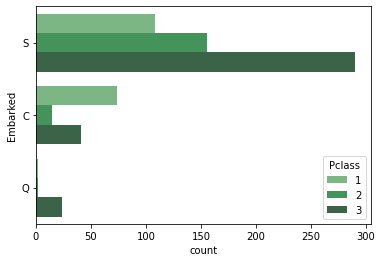

In [117]:
sns.countplot(y="Embarked", hue="Pclass", data=titanic_df, palette="Greens_d");

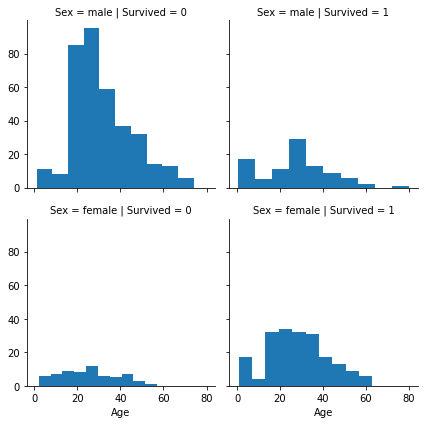

In [118]:
g = sns.FacetGrid(titanic_df, row="Sex", col="Survived")
g.map(plt.hist, "Age")

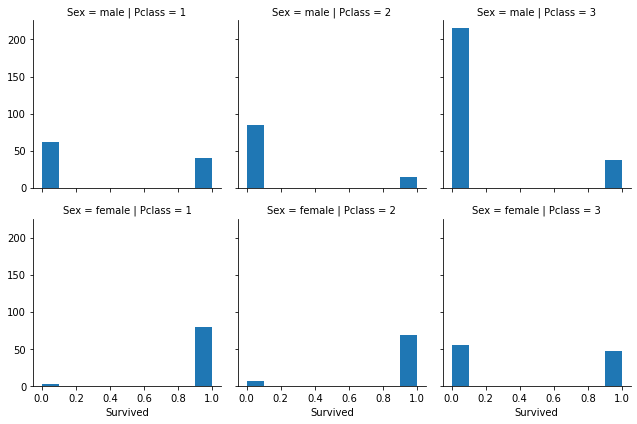

In [119]:
g = sns.FacetGrid(titanic_df, row="Sex", col="Pclass")
g.map(plt.hist, "Survived")

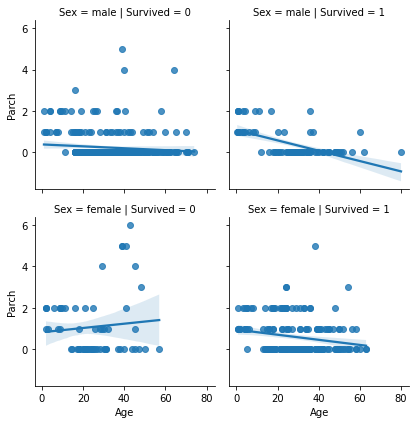

In [120]:
g = sns.FacetGrid(titanic_df, row="Sex", col="Survived")
g.map(sns.regplot, "Age", "Parch")